<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل هفتم: GRU, LSTM
    </font>
    <br>
      نویسندگان:‌ علیرضا دهقانپور فراشاه
    <hr>
<br>
  <div align="right">
  <font color="red" size=5>فهرست مطالب</font>
	<ul>
    <li>
        <a href='#intro'>
        مقدمه
        <ul>
          <li>
            <a href="#dataset">
              آشنایی با دیتاست
            </a>
          </li>
          <li>
            <a href="#preprocessing">
              آماده سازی دیتاست
            </a>
          </li>
        </ul>
    </a>
		</li>
		<li>
      <a href="#architecture">
       تعریف معماری مدل
      </a>
    </li>
    <li>
      <a href="#training">
       آموزش مدل
      </a>
    </li>
    <li>
      <a href="#test">
       تست مدل
      </a>
    </li>
    <li>
      <a href="#gru">
       مدل GRU      </a>
    </li>
    <li>
      <a href="#bdlstm">
       Bidirectional LSTM      </a>
    </li>
    <li>
      <a href="#cleantext">
       تمیز کردن متون      </a>
    </li>
    <li>
      <a href="#nextwordtest">
     تست مدل next word prediction     </a>
    </li>
    </li>
    </div>
</font>
</div>


  <div dir=rtl id="intro">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        مقدمه
      </font>
      <hr />
      شبکه های عصبی بازگشتی که در بخش قبل دیدیم با مشکل vanishing gradient همراه بودند. برای رفع این مشکل سراغ LSTM رفتیم که همانطور که در اسلایدها مشاهده کردید تا حدی این ایراد را برطرف میکند و میتواند توالی بزرگتری از داده را به خاطر بسپرد.  
      </br>
      در این بخش میخواهیم با استفاده از LSTM قیمت سهام IBM را پیش بینی کنیم.

</font>
</div>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout, GRU
import math
from sklearn.metrics import mean_squared_error


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با دیتاست
      </font>
      <hr />
        در این بخش میخواهیم ستون 
        <font face="Roboto">high</font>
        را با استفاده از مدل های بازگشتی با
        <font face="Roboto">LSTM</font>
        و 
        <font face="Roboto">GRU</font>
        پیش بینی کنیم.
  </font>
  </div>

In [3]:
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
dataset.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3020 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3020 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3020 non-null   float64
 4   Volume  3020 non-null   int64  
 5   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.2+ KB



  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      <font color="red" size=5>آماده سازی دیتاست</font>
      <hr />
      در این بخش داده را به دو بخش
      <font face="Roboto">Train</font>
      و
      <font face="Roboto">Test</font>
      تقسیم میکنیم.
       بخش 
      <font face="Roboto">Test</font>
      در واقع بخشی است که با مدل قیمت سهام را پیش بینی میکنیم و با مقدار واقعی آن مقایسه میکنیم.
      سال ۲۰۱۷ را برای پیش بینی به عنوان تست در نظر میگیریم.    ‍
  </div>

In [6]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

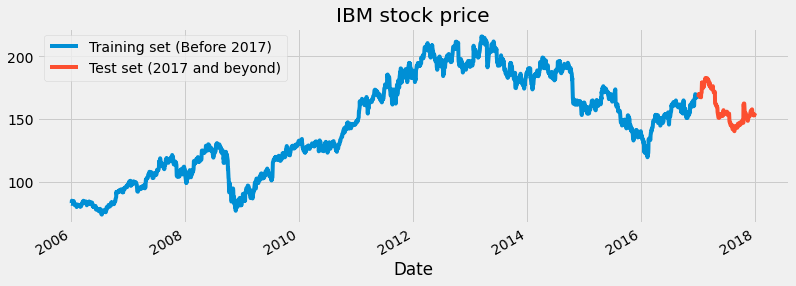

In [7]:
dataset["High"][:'2016'].plot(figsize=(12,4),legend=True)
dataset["High"]['2017':].plot(figsize=(12,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

<div dir=rtl>
<font face="XB Zar" size=4>
<hr/>
      از 
      <font face="Roboto">MinMaxScaler</font>  
        برای نرمال کردن داده ها استفاده میکنیم تا اعداد بین ۰ و ۱ قرار بگیر‍ن‍د‍ و همچنین از هر ۶۰ 
         ‍‍‍‍<font face="Roboto">timestep</font>
         برای پیش بینی بعدی استفاده میکنیم. 
         بنابراین داده را به این صورت میسازیم که هر ۶۰
         <font face="Roboto">timestep</font>
         یک بردار نامپای خواهد شد که به ازای آن یک خروجی
<font face="Roboto">$y^{<t>}$</font>
         خواهیم داشت که مقدار پیش بینی شده است.

</div>


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape, y_train.shape)

(2709, 60) (2709,)


In [10]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape


(2709, 60, 1)

<div dir="rtl" id="architecture">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        تعریف معماری مدل
      </font>
      <hr />
در این مدل از چند لایه 
<font face="Roboto">LSTM</font>
استفاده میکنیم.
</br>
در هر لایه پارامتر
<font face="Roboto">unit</font>
بُعد خروجی را مشخص میکند.
یعنی انتظار داریم بردارهای 
<font face="Roboto">$a^{<t>}$</font>
و
<font face="Roboto">$c^{<t>}$</font>
هر کدام یک بردار
<font dir="ltr" face="Roboto">$(50, 1)$</font>
باشند.
    </div>

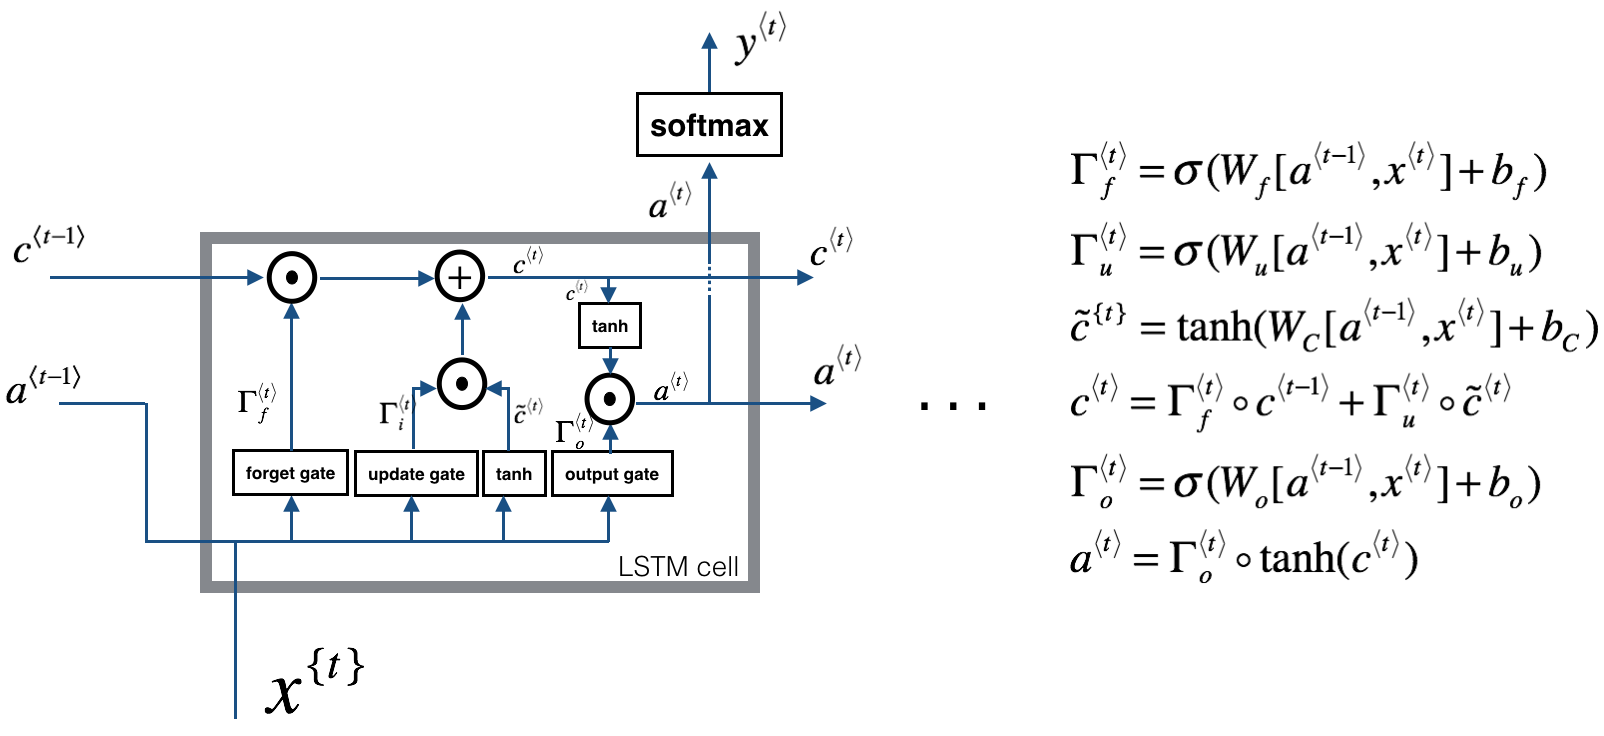

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2


  <div dir="rtl" id="architecture">
    <font face="XB Zar" size=4>
      <hr />
تعداد پارامترها به این صورت است که داده ورودی ما یک بردار
<font dir="ltr" face="Roboto">$(60, 1)$</font>
است که یعنی تعداد 
<font  face="Roboto">feature</font>
برابر ۱ است. یعنی 
<font dir="ltr" face="Roboto">$x^{<t>}$</font>
یک عدد است.
</br>
 بنابراین ماتریس های 
<font face="Roboto">$W_f, W_u, W_c, W_o$</font>
همگی ماتریس هایی
<font face="Roboto">$(50, 51)$</font>
همچنین بردارهای بایاس 
<font face="Roboto">$b_f, b_u, b_c, b_o$</font>
همگی
<font face="Roboto">$(50, 1)$</font>
هستند. بنابراین کل پارامترهای لایه اول میشود
<font face="Roboto">$4\times(50\times 51 + 50) = 10400$</font>
    </div>

    

<div dir="rtl" id="training">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        آموزش مدل      </font>
      <hr />
در ادامه مدل را ترین می کنیم.
    </div>

In [ ]:
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
85/85 [==============================] - 96s 980ms/step - loss: 0.0259
Epoch 2/50
85/85 [==============================] - 79s 936ms/step - loss: 0.0106
Epoch 3/50
85/85 [==============================] - 80s 942ms/step - loss: 0.0088
Epoch 4/50
85/85 [==============================] - 80s 937ms/step - loss: 0.0071
Epoch 5/50
85/85 [==============================] - 79s 926ms/step - loss: 0.0063
Epoch 6/50
85/85 [==============================] - 78s 923ms/step - loss: 0.0055
Epoch 7/50
85/85 [==============================] - 81s 957ms/step - loss: 0.0050
Epoch 8/50
85/85 [==============================] - 79s 924ms/step - loss: 0.0043
Epoch 9/50
85/85 [==============================] - 78s 917ms/step - loss: 0.0041
Epoch 10/50
85/85 [==============================] - 79s 926ms/step - loss: 0.0040
Epoch 11/50
85/85 [==============================] - 79s 929ms/step - loss: 0.0035
Epoch 12/50
85/85 [==============================] - 79s 927ms/step - loss: 0.0035
Epoch 13/50
8

In [ ]:
regressor.save("lstm_ibmstock.h5")

<div dir="rtl" id="test">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
       تست مدل
             </font>
      <hr />
در ابتدا نموداری را که میخواهیم مدل پیش بینی کند را رسم کرده و سپس 
<font face="Roboto">X_test</font>
را میسازیم و به مدل ورودی میدهیم و خروجی آن را در کنار مقدار واقعی رسم میکنیم.
    </div>

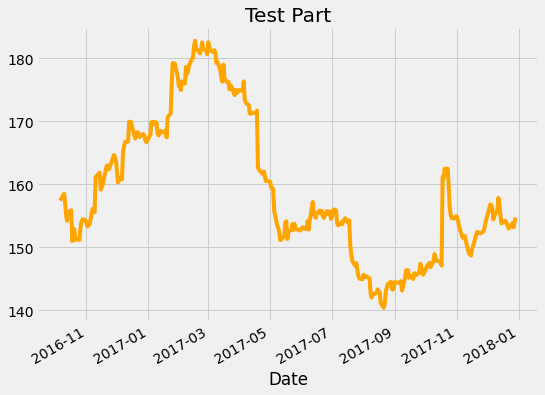

In [15]:
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
dataset_total[len(dataset_total)-len(test_set) - 60:].plot(figsize=(8,6),c='orange')
plt.title('Test Part')
plt.show()

In [16]:
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)
len(inputs)

311

In [ ]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [19]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

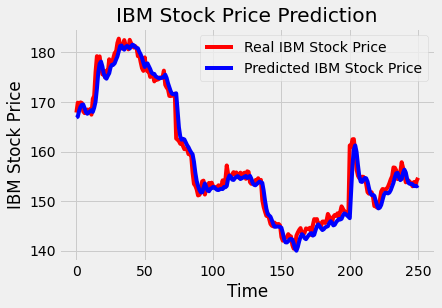

In [ ]:
plot_predictions(test_set,predicted_stock_price)

<div dir="rtl" id="gru">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
       مدل GRU
             </font>
      <hr />
مدلی با معماری مدل قبل فقط با این تفاوت که به جای بلاک های 
<font face="Roboto">LSTM</font>
از
<font face="Roboto">GRU</font>
استفاده میکنیم.
    </div>

In [11]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True,  activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

regressorGRU.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7800      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15150     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 60, 50)            15150     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)                1

In [12]:
regressorGRU.compile(optimizer='rmsprop', loss='mean_squared_error')


regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)


Epoch 1/50
19/19 [==============================] - 24s 756ms/step - loss: 0.0434
Epoch 2/50
19/19 [==============================] - 14s 747ms/step - loss: 0.0127
Epoch 3/50
19/19 [==============================] - 16s 856ms/step - loss: 0.0104
Epoch 4/50
19/19 [==============================] - 14s 762ms/step - loss: 0.0099
Epoch 5/50
19/19 [==============================] - 16s 827ms/step - loss: 0.0091
Epoch 6/50
19/19 [==============================] - 15s 777ms/step - loss: 0.0080
Epoch 7/50
19/19 [==============================] - 15s 775ms/step - loss: 0.0081
Epoch 8/50
19/19 [==============================] - 14s 756ms/step - loss: 0.0081
Epoch 9/50
19/19 [==============================] - 15s 779ms/step - loss: 0.0071
Epoch 10/50
19/19 [==============================] - 15s 775ms/step - loss: 0.0078
Epoch 11/50
19/19 [==============================] - 15s 770ms/step - loss: 0.0069
Epoch 12/50
19/19 [==============================] - 16s 829ms/step - loss: 0.0071
Epoch 13/50
1

In [ ]:
regressorGRU.save("gru_ibmstock.h5")

In [17]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

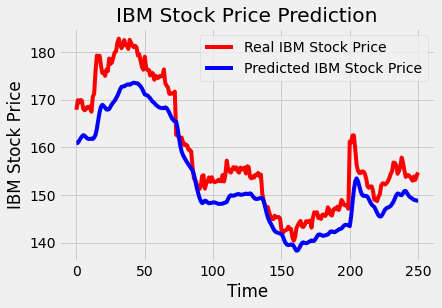

In [20]:
plot_predictions(test_set,GRU_predicted_stock_price)

<div dir="rtl" id="‌b‌d‌l‌s‌t‌m‌">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
       Bidirectional LSTM
             </font>
      <hr />
در این بخش سعی داریم با استفاده از
<font face="Roboto">Bidirectional LSTMs</font>
یک مدل برای تسک
<font face="Roboto">next word prediction</font>
آموزش دهیم. برای این کار از یک دیتاست که شامل عنوان های سایت 
<a href"medium.com">
<font face="Roboto">medium</font>
</a>
است استفاده میکنیم.
    </div>

In [2]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
medium_data = pd.read_csv("medium_data.csv")
medium_data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

<div dir="rtl" id="cleantext">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
       تمیز کردن متون
             </font>
      <hr />
این عناوین شامل کاراکترهایی است که باید حذف شوند.
سپس با استفاده از 
<font face="Roboto">tokenizer</font>
تمامی لغات این عناوین را
<font face="Roboto">index</font>
می کنیم.
همچنین این توالی ها را به اندازه بزرگترین توالی با عملیات 
<font face="Roboto">padding</font>
یک اندازه میکنیم.
    </div>

In [7]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)

Total number of words:  8238


In [8]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
print(input_sequences)
print("Total input sequences: ", len(input_sequences))

[[5, 676], [5, 676, 68], [5, 676, 68, 2], [5, 676, 68, 2, 452], [5, 676, 68, 2, 452, 1518], [5, 676, 68, 2, 452, 1518, 14], [5, 676, 68, 2, 452, 1518, 14, 2455], [5, 676, 68, 2, 452, 1518, 14, 2455, 3653], [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99], [1858, 23], [1858, 23, 741], [1858, 23, 741, 81], [1858, 23, 741, 81, 103], [1858, 23, 741, 81, 103, 14], [1858, 23, 741, 81, 103, 14, 345], [1858, 23, 741, 81, 103, 14, 345, 345], [1858, 23, 741, 81, 103, 14, 345, 345, 1859], [7, 2], [7, 2, 67], [7, 2, 67, 3654], [7, 2, 67, 3654, 9], [7, 2, 67, 3654, 9, 40], [3655, 7], [3655, 7, 2], [3655, 7, 2, 266], [3655, 7, 2, 266, 1283], [3655, 7, 2, 266, 1283, 9], [3655, 7, 2, 266, 1283, 9, 2456], [3655, 7, 2, 266, 1283, 9, 2456, 23], [3655, 7, 2, 266, 1283, 9, 2456, 23, 10], [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938], [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938, 222], [5, 192], [5, 192, 64], [5, 192, 64, 192], [5, 192, 64, 192, 485], [5, 192, 64, 192, 485, 6], [5, 192, 64, 192, 485, 6, 1860]

In [9]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
max_sequence_len

40

<div dir="rtl" id="bdarchitecture">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
       معماری مدل دو طرفه             </font>
      <hr />
هر داده آموزش ما شامل یک توالی از کلمات بدون کلمه آخر است که کلمه آخر درواقع برچسب آن داده است.
توجه کنید که لایه 
<font face="Roboto">Embedding</font>
نمایشی برای کلمات یاد خواهد گرفت که هر کلمه با یک بردار به طول ۱۰۰ قابل نمایش باشد پ چون ۸۲۳۸ کلمه داشتیم تعداد پارامترهایی قابل یادگیری آن ۸۲۳۸۰۰ است.
</br>
خروجی این لایه یک ماتریس به ابعاد
<font face="Roboto">$(39, 100)$</font>
است که ورودی به
<font face="Roboto">Bidirectonal LSTM</font>
داده میشود.
خروجی این لایه یک بردار به طول ۳۰۰ است که از اتصال دو بردار ۱۵۰تایی خروجی لایه رفت و برگشت تشکیل شده است.
    </div>

In [10]:
x_train, labels = input_sequences[:,:-1],input_sequences[:,-1]
y_train = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           823800    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8238)              2479638   
                                                                 
Total params: 3,604,638
Trainable params: 3,604,638
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [31]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
1515/1515 [==============================] - 17s 11ms/step - loss: 2.1621 - accuracy: 0.5138
Epoch 2/50
1515/1515 [==============================] - 16s 11ms/step - loss: 2.1464 - accuracy: 0.5158
Epoch 3/50
1515/1515 [==============================] - 18s 12ms/step - loss: 2.1422 - accuracy: 0.5187
Epoch 4/50
1515/1515 [==============================] - 17s 11ms/step - loss: 2.1470 - accuracy: 0.5178
Epoch 5/50
1515/1515 [==============================] - 16s 11ms/step - loss: 2.1535 - accuracy: 0.5209
Epoch 6/50
1515/1515 [==============================] - 16s 11ms/step - loss: 2.1504 - accuracy: 0.5206
Epoch 7/50
1515/1515 [==============================] - 16s 11ms/step - loss: 2.1304 - accuracy: 0.5201
Epoch 8/50
1515/1515 [==============================] - 17s 11ms/step - loss: 2.1585 - accuracy: 0.5170
Epoch 9/50
1515/1515 [==============================] - 17s 11ms/step - loss: 2.1923 - accuracy: 0.5138
Epoch 10/50
1515/1515 [==============================] - 17s 11m

<div dir="rtl" id="nextwordtest">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        تست مدل next word prediction            </font>
      <hr />
در این قسمت با دادن کلمات ابتدایی و مشخص کردن تعداد کلمات بعدی با ورودی دادن توالی ابتدایی به مدل برداری از احتمال هر یک از کلمات بدست میاوریم و کلمه با بیشترین احتمال را انتخاب میکنیم و به توالی قبلی اضافه میکنیم و دوباره توالی جدید را به مدل ورودی میدهیم.
نمونه خروجی آن را مشاهده میکنید.
    </div>

In [43]:
seed_text = "bidirectional recurrent"
next_words = 4
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index ==np.argmax(predicted, axis=1):
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

bidirectional recurrent neural networks security vulnerabilities
